
# Analisis Sentimen Bilibli.com dengan Naive Bayes Classifier
Notebook ini mengimplementasikan analisis sentimen analisis dengan pendekatan naive bayes sebagai classifier

  

**Alur Kerja:**
1. Load library dan dataset
2. Eksplorasi Data Awal (EDA)
3. Preprocessing teks untuk bahasa Indonesia
4. Pembagian dataset
5. Pemodelan dengan Naive Bayes
6. Evaluasi model


## Loading Dependency

In [ ]:
%pip install sastrawi
%pip install wordcloud
%pip install emoji
!pip install swifter
!pip install nlp_id
!pip install joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=451d5f6483f4f11c1010c2af774667f0a42abd6a3f4f0c17f2c95eb43219a26d
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.3/484.3 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 23.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha25

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=0c4afaef373bac3fe34288a7c26f2a28ae3a62dd7cf70a3d63b071383889fc90
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import words as nltk_words
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.stopword import StopWord
import emoji
import swifter
from langdetect import detect
import langdetect.lang_detect_exception
import joblib as jb

#model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#google drive
from google.colab import drive
drive.mount('/content/drive')

#nltk dependency
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# path = "/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/"

# Raffy coba
path = "/content/drive/MyDrive/TUBES_PT/dataset/"

if not path:
  drive.mount('/content/drive')
  # path = "/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/"
  path = "/content/drive/MyDrive/TUBES_PT/dataset/" # Raffy
else :
  print(f"Path ditemukan pada path {path}")

Path ditemukan pada path /content/drive/MyDrive/TUBES_PT/dataset/


##Loading dataset

In [ ]:
file_name = "blibli_app_review.csv"

data = pd.read_csv(path+file_name)
data['content'].sample(10, random_state=None)

,content
10295,Blibli adalah salah satu perusahaan milik PT. ...
11664,"Bayar listrik pake blibli, pas checkout udh ke..."
670,mantap
26140,Ok
3979,Halo kk saya memesan produk di penjual 'indone...
26815,"Maksa banget minta update, kalo gak update gak..."
34219,Itu dulu soale blm pernah
9555,Buat pesanan pertama cukup cepat dan akurat.. ...
40703,Lemot bgt yaaaaa??? Bsa di buka tp au bkin aku...
21029,"Selalu puas belanja di Blibli,harga bersaing,c..."


In [ ]:
#selecting awal

#jika da panjang 'content' hanya senilai 4 atau null, maka drop
data_filtered = data[data['content'].str.split().str.len() >= 4].copy()
data_filtered = data_filtered[data_filtered['content'].str.strip() != '']

#ganti nama score -> rating
data_filtered = data_filtered.rename(columns={'score': 'rating'})

print("Jumlah data orisinil", data.shape)
print("Setelah filter:", data_filtered.shape)
data_filtered.head()

df = data_filtered.copy()

Jumlah data orisinil (40803, 8)
Setelah filter: (28684, 8)


## Teorema Pengolahan Teks & Naive Bayes

### 2.1 Natural Language Processing (NLP)

Natural Language Processing (NLP) adalah sebuah kecerdasan buatan yang memungkinkan komputer memahami interaksi manusia melalui bahasa alami. NLP memungkinkan komputer untuk memahami, menganalisis, dan memproses data tekstual yang kemudian dapat digunakan untuk memahami persepsi pengguna, seperti dalam analisis sentimen ulasan pengguna Blibli.

---

### 2.2 Naive Bayes Classifier

Naive Bayes Classifier (NBC) adalah metode klasifikasi yang didasarkan pada teorema Bayes. Dalam metode Naive Bayes, klasifikasi dilakukan berdasarkan probabilitas yang dihitung dari data yang tersedia. Metode ini menggunakan asumsi independensi yang kuat antar fitur, yang menjadikannya efisien untuk pemrosesan teks.

**Rumus dasar Naive Bayes:**

$$
P(C|X) = \frac{P(X|C) \times P(C)}{P(X)}
$$

Dimana:
- \(P(C|X)\) = probabilitas kelas \(C\) berdasarkan kondisi \(X\)
- \(P(X|C)\) = probabilitas \(X\) diberikan kelas \(C\)
- \(P(C)\) = probabilitas kelas \(C\)
- \(P(X)\) = probabilitas dari \(X\)

---

### 2.3 Analisis Sentimen

Analisis sentimen merupakan teknik untuk mengidentifikasi dan mengkategorikan opini atau emosi yang terdapat dalam sebuah teks. Dengan menggunakan algoritma pembelajaran mesin seperti Naive Bayes, sistem dapat menentukan apakah suatu teks bersentimen positif atau negatif.

Dalam penelitian ini, analisis sentimen difokuskan pada tiga kelas utama:
- **Positif**
- **Netral**
- **Negatif**

---

### 2.4 Preprocessing Text

Preprocessing adalah tahap awal yang penting dalam analisis data teks. Tujuannya adalah membersihkan dan mempersiapkan teks sebelum dianalisis lebih lanjut.

Tahapan preprocessing meliputi:

- **Cleaning**: Menghapus karakter-karakter yang tidak penting seperti angka, simbol, dan karakter khusus.
- **Tokenizing**: Memisahkan teks menjadi token-token (kata atau frasa kecil).
- **Convert Negation** : memastikan suatu kalimat tetap pada maknanya  
- **Stopwords**: Menghapus stopwords (kata umum yang tidak memiliki makna penting) dan tanda baca.
- **Stemming**: Mengubah kata ke bentuk dasarnya.

---


## Rekayasa Fitur

In [ ]:
#membuat labeling kelas
def label_sentimen(rating):
    if rating >= 4:
        return 'positif'
    elif rating <= 2:
        return 'negatif'
    else:
        return 'netral'

df['label'] = df['rating'].apply(label_sentimen)
dataframe = df

##Exploratory Data Analysis

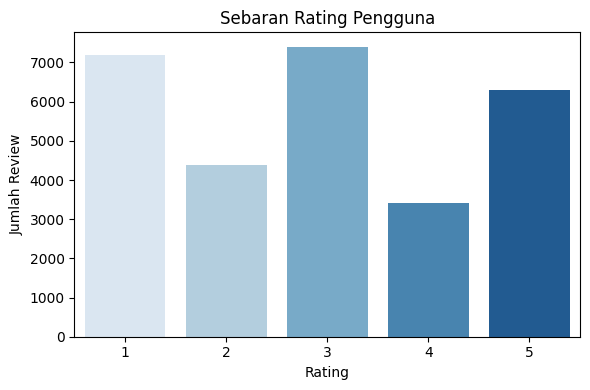

In [ ]:
#visualisasi Sebaran Rating

plt.figure(figsize=(6, 4))
sns.countplot(data=dataframe, x='rating', palette='Blues')
plt.title('Sebaran Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()


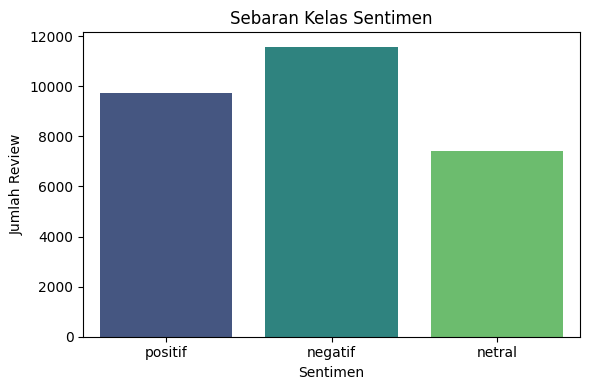

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataframe, x='label', palette='viridis')
plt.title('Sebaran Kelas Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()

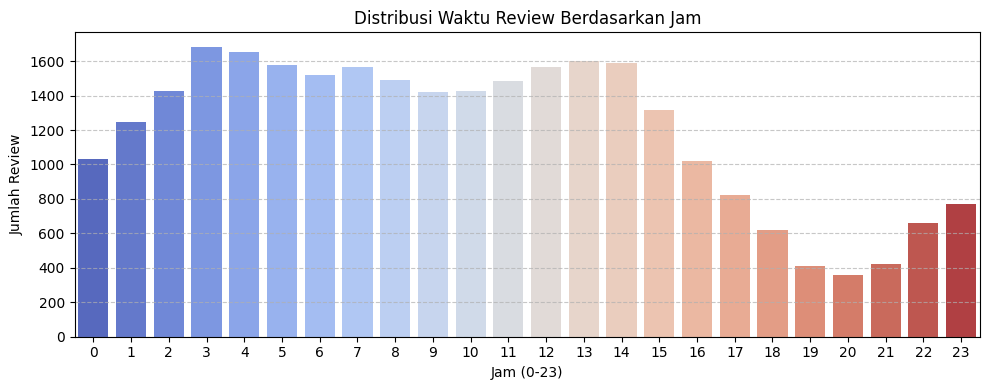

In [ ]:
# Distribusi Review pengguna berdasarkan jam
dataframe['created_at'] = pd.to_datetime(dataframe['created_at'], errors='coerce')

df['hour'] = df['created_at'].dt.hour

plt.figure(figsize=(10, 4))
sns.countplot(data=dataframe, x='hour', palette='coolwarm')
plt.title('Distribusi Waktu Review Berdasarkan Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Review')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Text Preprocessing

In [ ]:
positive_df = dataframe[dataframe['label'] == 'positif'].sample(min(2000, dataframe[dataframe['label'] == 'positif'].shape[0]), random_state=42)
netral_df = dataframe[dataframe['label'] == 'netral'].sample(min(2000, dataframe[dataframe['label'] == 'netral'].shape[0]), random_state=42)
negatif_df = dataframe[dataframe['label'] == 'negatif'].sample(min(2000, dataframe[dataframe['label'] == 'negatif'].shape[0]), random_state=42)


sampled_df = pd.concat([positive_df, netral_df, negatif_df])

sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Jumlah data setelah pengambilan 6500 sampel per kelas:", sampled_df.shape)
print("\nSebaran data per kelas setelah sampling:")
print(sampled_df['label'].value_counts())

dataframe = sampled_df.copy()


Jumlah data setelah pengambilan 6500 sampel per kelas: (6000, 10)

Sebaran data per kelas setelah sampling:
label
positif    2000
netral     2000
negatif    2000
Name: count, dtype: int64


In [ ]:
#tokenisasi
def tokenize_text(text):
    tokens = word_tokenize(text) # Tokenization
    return tokens

dataframe['content_tokenized'] = dataframe['content'].swifter.apply(tokenize_text)
dataframe[['content', 'content_tokenized']].head()

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

,content,content_tokenized
0,Blibli ini kenapa mau byr ada keterangan error...,"[Blibli, ini, kenapa, mau, byr, ada, keteranga..."
1,Nyoba dulu kalo bagus nanti di tambahin,"[Nyoba, dulu, kalo, bagus, nanti, di, tambahin]"
2,Aplikasi ini sangat berguna untuk kita tapi .....,"[Aplikasi, ini, sangat, berguna, untuk, kita, ..."
3,Ntr w tambah law dah coba belanja ....ya,"[Ntr, w, tambah, law, dah, coba, belanja, ......."
4,Update nya wajib. Kl gak diupdate gak bs dibuk...,"[Update, nya, wajib, ., Kl, gak, diupdate, gak..."


In [ ]:
def clean_token(token, kamus_dict):
    token = token.lower()

    try:
        lang = detect(token)
    except langdetect.lang_detect_exception.LangDetectException:
        # fallback kalau token terlalu pendek
        lang = "id"

    # Jangan ubah kalau bukan bahasa Indonesia
    if lang != "id":
        return token

    # Proses pembersihan untuk Bahasa Indonesia
    token = re.sub(r'\d+', '', token)
    token = re.sub(r'[%s]' % re.escape(string.punctuation), '', token)
    token = emoji.replace_emoji(token, replace='')
    token = kamus_dict.get(token, token)
    token = re.sub(r'(.)\1{1,}', r'\1', token)

    return token


# path_kamus = '/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/slangs.csv'
path_kamus = '/content/drive/MyDrive/TUBES_PT/dataset/slangs.csv' # Raffy
kamus = pd.read_csv(path_kamus)
kamus_dict = dict(zip(kamus['Slang'].astype(str).str.lower(), kamus['Baku'].astype(str).str.lower()))

# Terapkan ke setiap token dalam list
dataframe['cleaned_tokens'] = dataframe['content_tokenized'].swifter.apply(lambda tokens: [clean_token(tok, kamus_dict) for tok in tokens])

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [ ]:
pd.set_option('display.max_colwidth', None)
dataframe[['content', 'cleaned_tokens']].sample(10)

,content,cleaned_tokens
4382,"Gabisa login_- ribet amat verifikasi juga bener angkanya, masih aja gabisa login_- udah di update masih aja gabisa login_-","[gabisa, login_-, ribet, amat, verifikasi, juga, bener, angkanya, , masih, aja, gabisa, login_-, udah, di, update, masih, aja, gabisa, login_-]"
1975,Belum masuk pinjaman uang cepat,"[belum, masuk, pinjaman, uang, cepat]"
2740,"Barangnya lengkap tapi , aku mau daftar kok nggak terdaftar sih padahal \nbanyak yang aku pesan","[barangnya, lengkap, tapi, , aku, mau, daftar, kok, nggak, terdaftar, sih, padahal, banyak, yang, aku, pesan]"
2863,"produknya bagus, packing rapi jadi paling suka belanja di blibli","[produknya, bagus, , packing, rapi, jadi, paling, suka, belanja, di, blibli]"
1496,"Setelah update malah sering keluar sendiri padahal yg sebelumnya lancar"" aja..tolong bantuannya ya...","[setelah, update, malah, sering, keluar, sendiri, padahal, yg, sebelumnya, lancar, , aja, , tolong, bantuanya, ya, ]"
4589,Saya mau cba dlu blanja ya Nanti klo emang aplikasi ini terpercaya dan NO tipu tipu..saya tambah bintang nya.. Tpi klo misalkan nih aplikasi ada proses penipuan saya kurangi bintangnya..,"[saya, mau, cba, dlu, blanja, ya, nanti, klo, emang, aplikasi, ini, terpercaya, dan, no, tipu, tipu, , saya, tambah, bintang, nya, , tpi, klo, misalkan, nih, aplikasi, ada, proses, penipuan, saya, kurangi, bintangnya, ]"
3147,Produk disini mahal2 banget. Padahal kualitas sama dgn produk di aplikasi sebelah.,"[produk, disini, mahal2, sekali, , padahal, kualitas, sama, dgn, produk, di, aplikasi, sebelah, ]"
2421,Belum pernah coba beli sih,"[belum, pernah, coba, beli, sih]"
2562,Belanja banyak di cancel uang gak langsung kembali pengembalian dana prosesnya 2hari kerja semakin lama semakin parah blibli kalau produkmu murah terus banyak yang beli silakan kan naikkan harganya jangan asal cancel aja,"[belanja, banyak, di, cancel, uang, gak, langsung, kembali, pengembalian, dana, prosesnya, 2hari, kerja, semakin, lama, semakin, parah, blibli, kalau, produkmu, murah, terus, banyak, yang, beli, silakan, kan, naikkan, harganya, jangan, asal, cancel, aja]"
2991,Bayar di tempat bisa mau hp baru,"[bayar, di, tempat, bisa, mau, hp, baru]"


In [ ]:
# def clean_text(text):
#     if pd.isna(text):
#         return ""

#     text = text.lower()

#     # Hilangkan newline
#     text = re.sub(r'\n', ' ', text)

#     # Hilangkan URL
#     text = re.sub(r'https?://\S+|www\.\S+', '', text)

#     # Hilangkan mention dan hashtag
#     text = re.sub(r'@\w+', '', text)
#     text = re.sub(r'#\w+', '', text)

#     # Hilangkan angka dan tanda baca
#     text = re.sub(r'\d+', '', text)
#     text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

#     # Hilangkan emoji
#     text = emoji.replace_emoji(text, replace='')

#     # Hilangkan spasi berlebihan
#     text = re.sub(r'\s{2,}', ' ', text).strip()

#     # Load kamus slang
#     path_kamus = '/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/slangs.csv'
#     kamus = pd.read_csv(path_kamus)
#     kamus_dict = dict(zip(kamus['Slang'].astype(str).str.lower(), kamus['Baku'].astype(str).str.lower()))

#     # Replacing slang
#     words = text.split()
#     normalized = [kamus_dict.get(word, word) for word in words]

#     def check_repetition_typing(word):
#       # Menghapus karakter yang diulang lebih dari dua kali berturut-turut
#       return re.sub(r'(.)\1{1,}', r'\1', word)

#     # Repetisi normalization
#     normalized = [check_repetition_typing(word) for word in normalized]

#     return ' '.join(normalized)

In [ ]:
# dataframe['cleaned_token'] = dataframe['content_tokenized'].swifter.apply(clean_text)

In [ ]:
dataframe.shape
dataframe = dataframe[['content','content_tokenized','cleaned_tokens','label']]
dataframe.sample(20, random_state=None)

,content,content_tokenized,cleaned_tokens,label
4996,Sayang buka nya agk lelet.,"[Sayang, buka, nya, agk, lelet, .]","[sayang, buka, nya, agk, lelet, ]",negatif
4812,Cara lihat cashback transaksi tagihan dimana ya,"[Cara, lihat, cashback, transaksi, tagihan, dimana, ya]","[cara, lihat, cashback, transaksi, tagihan, dimana, ya]",netral
5822,Udah males pesan lewat blibli..php doank..pesanan g dikirim2..pdhl sangat diharapkan untuk pesanan orang lain...udah kapok belanja lgi dsni..uninstall z,"[Udah, males, pesan, lewat, blibli, .., php, doank, .., pesanan, g, dikirim2, .., pdhl, sangat, diharapkan, untuk, pesanan, orang, lain, ..., udah, kapok, belanja, lgi, dsni, .., uninstall, z]","[udah, males, pesan, lewat, blibli, , php, doank, , pesanan, g, dikirim, , pdhl, sangat, diharapkan, untuk, pesanan, orang, lain, , udah, kapok, belanja, lgi, dsni, , uninstall, z]",negatif
4851,Tpi ko susah d instal,"[Tpi, ko, susah, d, instal]","[tpi, ko, susah, d, instal]",netral
2401,blibli top banget.....beli yg ber volume seperti minyak goreng juga gratis ongkir...mantappp...promo nya banyak.... cepet sampai.,"[blibli, top, banget, ....., beli, yg, ber, volume, seperti, minyak, goreng, juga, gratis, ongkir, ..., mantappp, ..., promo, nya, banyak, ...., cepet, sampai, .]","[blibli, top, sekali, , beli, yg, ber, volume, seperti, minyak, goreng, juga, gratis, ongkir, , mantappp, , promo, nya, banyak, , cepet, sampai, ]",positif
1203,"Gak lengkap, saya cari sparepart vario gak ada. Hadehh","[Gak, lengkap, ,, saya, cari, sparepart, vario, gak, ada, ., Hadehh]","[gak, lengkap, , saya, cari, sparepart, vario, gak, ada, , hadehh]",netral
3489,Saya mau cara kredit barangnya?,"[Saya, mau, cara, kredit, barangnya, ?]","[saya, mau, cara, kredit, barangnya, ]",netral
67,Mikir donk klo ada yg ngasih bintang satu😏😏,"[Mikir, donk, klo, ada, yg, ngasih, bintang, satu😏😏]","[mikir, donk, klo, ada, yg, ngasih, bintang, satu]",netral
287,"Kenapa ya apk Blibli saya tidak bisa kebuka?? Tolong admin bantuanya,nanti saya kasih bintang 5 kalau apk nya sudah bisa digunakan","[Kenapa, ya, apk, Blibli, saya, tidak, bisa, kebuka, ?, ?, Tolong, admin, bantuanya, ,, nanti, saya, kasih, bintang, 5, kalau, apk, nya, sudah, bisa, digunakan]","[kenapa, ya, apk, blibli, saya, tidak, bisa, kebuka, , , tolong, admin, bantuanya, , nanti, saya, kasih, bintang, , kalau, apk, nya, sudah, bisa, digunakan]",negatif
5241,"mantap, banyakin lagi promonya","[mantap, ,, banyakin, lagi, promonya]","[mantap, , banyakin, lagi, promonya]",positif


In [ ]:
dataframe['cleaned_sentence'] = dataframe['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))
dataframe

/tmp/ipython-input-18-3827418992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['cleaned_sentence'] = dataframe['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))


,content,content_tokenized,cleaned_tokens,label,cleaned_sentence
0,Blibli ini kenapa mau byr ada keterangan error trus ya. Tolong di perbaiki min.,"[Blibli, ini, kenapa, mau, byr, ada, keterangan, error, trus, ya, ., Tolong, di, perbaiki, min, .]","[blibli, ini, kenapa, mau, byr, ada, keterangan, error, trus, ya, , tolong, di, perbaiki, min, ]",positif,blibli ini kenapa mau byr ada keterangan error trus ya tolong di perbaiki min
1,Nyoba dulu kalo bagus nanti di tambahin,"[Nyoba, dulu, kalo, bagus, nanti, di, tambahin]","[nyoba, dulu, kalo, bagus, nanti, di, tambahkan]",netral,nyoba dulu kalo bagus nanti di tambahkan
2,"Aplikasi ini sangat berguna untuk kita tapi ... Loading nya lama aku sih suka dengan aplikasi ini soalnya ku mau beli barang yangku ingin kan itu selalu ada , maaf jangan membuat keributan di sini klo yang lain ga suka aplikasi nya yaudah diam saja , saya bukan bermaksud untuk mengejek kalian yang posting aplikasi jelek atau apapun tapi minta tolong di hormati :)","[Aplikasi, ini, sangat, berguna, untuk, kita, tapi, ..., Loading, nya, lama, aku, sih, suka, dengan, aplikasi, ini, soalnya, ku, mau, beli, barang, yangku, ingin, kan, itu, selalu, ada, ,, maaf, jangan, membuat, keributan, di, sini, klo, yang, lain, ga, suka, aplikasi, nya, yaudah, diam, saja, ,, saya, bukan, bermaksud, untuk, mengejek, kalian, yang, posting, aplikasi, jelek, atau, apapun, tapi, minta, tolong, di, hormati, :, )]","[aplikasi, ini, sangat, berguna, untuk, kita, tapi, , loading, nya, lama, aku, sih, suka, dengan, aplikasi, ini, soalnya, ku, mau, beli, barang, yangku, ingin, kan, itu, selalu, ada, , maaf, jangan, membuat, keributan, di, sini, klo, yang, lain, ga, suka, aplikasi, nya, yaudah, diam, saja, , saya, bukan, bermaksud, untuk, mengejek, kalian, yang, posting, aplikasi, jelek, atau, apapun, tapi, minta, tolong, di, hormati, , ]",positif,aplikasi ini sangat berguna untuk kita tapi loading nya lama aku sih suka dengan aplikasi ini soalnya ku mau beli barang yangku ingin kan itu selalu ada maaf jangan membuat keributan di sini klo yang lain ga suka aplikasi nya yaudah diam saja saya bukan bermaksud untuk mengejek kalian yang posting aplikasi jelek atau apapun tapi minta tolong di hormati
3,Ntr w tambah law dah coba belanja ....ya,"[Ntr, w, tambah, law, dah, coba, belanja, ...., ya]","[ntr, w, tambah, law, dah, coba, belanja, , ya]",netral,ntr w tambah law dah coba belanja ya
4,Update nya wajib. Kl gak diupdate gak bs dibuka. Padahal tgl 4 sept br upadate🤔,"[Update, nya, wajib, ., Kl, gak, diupdate, gak, bs, dibuka, ., Padahal, tgl, 4, sept, br, upadate🤔]","[update, nya, wajib, , kl, gak, diupdate, gak, bs, dibuka, , padahal, tgl, , sept, br, upadate]",negatif,update nya wajib kl gak diupdate gak bs dibuka padahal tgl sept br upadate
...,...,...,...,...,...
5995,"tolong adain scan(Qris) biar saldo bisa ditarik ke ATM tanpa admin, jangan ngendap di blipay susah diambilnya, soalnya butuh itu saldo tapi gabisa diambil kalo gada qris. semogaa segera di adakan yaa. makasih","[tolong, adain, scan, (, Qris, ), biar, saldo, bisa, ditarik, ke, ATM, tanpa, admin, ,, jangan, ngendap, di, blipay, susah, diambilnya, ,, soalnya, butuh, itu, saldo, tapi, gabisa, diambil, kalo, gada, qris, ., semogaa, segera, di, adakan, yaa, ., makasih]","[tolong, adain, scan, , qris, , biar, saldo, bisa, ditarik, ke, atm, tanpa, admin, , jangan, ngendap, di, blipay, susah, diambilnya, , soalnya, butuh, itu, saldo, tapi, gabisa, diambil, kalo, gada, qris, , semogaa, segera, di, adakan, yaa, , makasih]",netral,tolong adain scan qris biar saldo bisa ditarik ke atm tanpa admin jangan ngendap di blipay susah diambilnya soalnya butuh itu saldo tapi gabisa diambil kalo gada qris semogaa segera di adakan yaa makasih
5996,Saya bayar tagihan pake bca gagal. Knpa saldo di kembalikan ke blipay knpa gk ke bca?. Giliran saya tarik saldo dari blipay ke bca . Butuh waktu 2/3 hari apaan. ? Lelet banget.,"[Saya, bayar, tagihan, pake, bca, gagal, ., Knpa, saldo, di, kembalikan, ke, b

###spellchecker : norvig propability


In [ ]:

import pandas as pd
from collections import Counter

def words(text):
    return re.findall(r'\w+', text.lower())

# Load dari slangs.csv
# df = pd.read_csv('/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/slangs.csv')
df = pd.read_csv('/content/drive/MyDrive/TUBES_PT/dataset/slangs.csv') # Raffy
basic_words = df['Baku'].dropna().astype(str).str.lower().tolist()

# # Load dari kata_dasar_KBBI.txt
# with open('/content/drive/MyDrive/SEMESTER_VI/CODETASKS/TEXTMININGPATHS/dataset/kata_dasar_KBBI.txt', 'r', encoding='utf-8') as f:
with open('/content/drive/MyDrive/TUBES_PT/dataset/kata_dasar_KBBI.txt', 'r', encoding='utf-8') as f: # Raffy
  kbbi_lines = [line.strip().lower() for line in f if line.strip()]
  kbbi_words = []
  for line in kbbi_lines:
    kbbi_words.extend(line.split())

#kata kata bahasa inggris
ENGLISH_WORDS = set(word.lower() for word in nltk_words.words())

BRAND_WORDS = set([
    "blibli", "tokopedia", "bukalapak", "shopee", "lazada",
    "grab", "gojek", "indomaret", "alfamart", "bca", "bni", "bri",
    "mandiri", "gopay", "ovo", "dana", "linkaja", "jnt", "jne", "sicepat", "indomaret", "alfamart",
    "bank"
])

combined_words = basic_words + kbbi_words + list(ENGLISH_WORDS) + list(BRAND_WORDS)
WORD_SET = set(w for w in combined_words if w.strip() and len(w) > 1)
WORDS = Counter(w for w in combined_words if w in WORD_SET)
WORDS = Counter(combined_words)
WORD_SET = set(combined_words)


def P(word, N=sum(WORDS.values())):
    return WORDS[word] / N

def correction(word):
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def correct_sentence(sentence):
    tokens = re.findall(r'\w+', sentence.lower())
    corrected = [correction(word) for word in tokens]
    return ' '.join(corrected)

def segment(word, dictionary=WORD_SET):
    """Segment word menjadi kata-kata baku valid dari dictionary"""
    n = len(word)
    dp = [None] * (n + 1)
    dp[0] = []

    for i in range(1, n + 1):
        for j in range(i):
            if dp[j] is not None and word[j:i] in dictionary:
                dp[i] = dp[j] + [word[j:i]]
                break
    return dp[-1]

def expand_numeric_repetition(word):
    match = re.match(r'([a-z]+)(\d+)', word)
    if match:
        base, count = match.groups()
        try:
            repeat = int(count)
            return ' '.join([base] * repeat)
        except:
            pass
    return word

def normalize_word(word):
    raw_word = word  # simpan kata asli
    word = re.sub(r'[^\w\s]', '', word.lower())

    # Cek langsung dari raw lowercase
    if raw_word.lower() in BRAND_WORDS:
        return raw_word.lower()

    if word in BRAND_WORDS:
        return word

    if word in ENGLISH_WORDS:
        return word

    expanded = expand_numeric_repetition(word)
    if expanded != word:
        return ' '.join(normalize_word(w) for w in expanded.split())

    if ' ' in word:
        return ' '.join(normalize_word(w) for w in word.split())

    if word in WORD_SET and len(word) > 2:
        return word

    segmented = segment(word)
    if segmented and all(len(w) > 2 for w in segmented):
        return ' '.join(correction(w) for w in segmented)

    return correction(word)

def normalize_sentence(sentence):
    tokens = re.findall(r'\w+', sentence.lower())
    return ' '.join(normalize_word(token) for token in tokens)


In [ ]:
#test fungsi
kalimat = "prduk tokpedia ggal apliks bsuk"
print(normalize_word(kalimat))

produk tokopedia gagal aplikasi busuk


In [ ]:
import swifter
dataframe['replaced_slangs'] = dataframe['cleaned_sentence'].swifter.apply(correct_sentence)
dataframe['norm_norvig'] = dataframe['replaced_slangs'].swifter.apply(normalize_sentence)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [ ]:
pd.set_option('display.max_colwidth', None)
# dataframe[["cleaned","normalized_text","label"]].sample(20) # KeyError: "['cleaned', 'normalized_text'] not in index"
dataframe[["cleaned_sentence","norm_norvig","label"]].sample(20)

,cleaned_sentence,norm_norvig,label
1896,saya mau ganti no hp karena hangus sdh dikirim email ke cs bli2 jawabannya bener2 parah dengan alasan kebanyakan data email baru kali ini ada aplikasi parah bgt tolong jgn di install sekali daftarin no hp kemudian mau ganti ga akan di ladenin gimana orng mau jualan setiap verifikasi ke no hp yg hangus aplikasi paling jelek dan parah,saya mau ganti no dp karena hangus sah diiris email ke es blip jawaban nya bener parah dengan alasan kebanyakan data email baru kali ini ada aplikasi parah bit tolong jin di install sekali daftar no dp kemudian mau ganti ga akan di adenin gimana orang mau jualan setiap verifikasi ke no dp yg hangus aplikasi paling jelek dan parah,negatif
4652,tingalkan aplikasi ini semakin ribet dengan segala ketentuan yang visinya dari awal memundahkan tapi ini apa mau tuker reward minta otp padahal no ku sudah angus payah not bad,tindakan aplikasi ini semakin ribet dengan segala ketentuan yang pipinya dari awal memindahkan tapi ini apa mau tukar reward minta top padahal no ku sudah angus payah not bad,negatif
511,dari bintang ke bintang ke bintang,dari bintang ke bintang ke bintang,positif
2330,kenapa tidak bisa terbuka,kenapa tidak bisa terbuka,netral
2377,kemana vocher 50k untuk penukaran poin 5k klo harus tungu 20k sampe kapan sekarang dapat poinnya lebih sedikit lagi,kelana voucher tak untuk penukaran poin k kol harus tungu 20 sampo kapan sekarang dapat pohonnya lebih sedikit lagi,positif
1961,kalau nggak ngecewakan di tambah bintangnya,kalau anggak mengecewakan di tambah bintangnya,netral
3591,mantap blibli pesan saya selalu puas belanja disini,mantap blibli pesan saya selalu puas belanja dini,positif
231,permisi kak apa disini bisa kredit hp,permisi kak apa dini bisa kredit dp,netral
951,pengiriman cepat dan barang tiba dgn aman,pengiriman cepat dan barang tiba dng aman,positif
4670,tp kok ga bisa bayar pakai bri atau bank lainny tlng di benahi biar bisa bayar lwt bri makasih,tp kok ga bisa bayar pakai bri atau bank lanny tang di berahi biar bisa bayar lot bri makasih,netral


###convert negation

In [ ]:
def convert_negation(text):
    negations = {'tidak', 'bukan', 'jangan', 'tak'}
    tokens = word_tokenize(text.lower())
    result = []
    skip_next = False

    for i in range(len(tokens)):
        if skip_next:
            skip_next = False
            continue
        if tokens[i] in negations and i+1 < len(tokens):
            result.append(tokens[i] + '_' + tokens[i+1])
            skip_next = True
        else:
            result.append(tokens[i])

    return ' '.join(result)

In [ ]:
# dataframe['convert_negation'] = dataframe['normalized_text'].swifter.apply(convert_negation) # KeyError: 'normalized_text'
dataframe['convert_negation'] = dataframe['norm_norvig'].swifter.apply(convert_negation)
pd.set_option('display.max_colwidth', None)
# dataframe[["normalized_text",'convert_negation',"label"]].sample(20) # KeyError: 'normalized_text'
dataframe[["norm_norvig",'convert_negation',"label"]].sample(20)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

,norm_norvig,convert_negation,label
1422,bb bb by request to all bbm mm mm mm mm mm,bb bb by request to all bbm mm mm mm mm mm,netral
853,sangat di sayangkan cara pembayaran melalui atm nya cuma ada mandiri bca kita di sini tidak adakah dari ambang tsb yg ada di sini bri sumsel sama bni jadi kalau mau transfer bukan sesama bank biasanya besar sd rb saran saya sih kalau bisa buka semua cabang pembayarannya jin cuma mandiri bca aja,sangat di sayangkan cara pembayaran melalui atm nya cuma ada mandiri bca kita di sini tidak_adakah dari ambang tsb yg ada di sini bri sumsel sama bni jadi kalau mau transfer bukan_sesama bank biasanya besar sd rb saran saya sih kalau bisa buka semua cabang pembayarannya jin cuma mandiri bca aja,netral
848,senang sekali aku belanja dini api nya bagus dan juga kurir nya ramaaaahhhh,senang sekali aku belanja dini api nya bagus dan juga kurir nya ramaaaahhhh,positif
5212,tolong kol dari merchant jin lama gerim nya,tolong kol dari merchant jin lama gerim nya,netral
5022,aplikasi sip lah blibli tidak bisa distal di android lebih tinggi ya,aplikasi sip lah blibli tidak_bisa distal di android lebih tinggi ya,netral
4716,sesuka ini sma blibli gratis ongkir jelas bayar nanti indo dana nya pun tak rewel penagihan uma kekurangan pilihan produknya mah bom selengkap commerce lain api sah mencukupi kebutuhan saya sih thanks blibli,sesuka ini sma blibli gratis ongkir jelas bayar nanti indo dana nya pun tak_rewel penagihan uma kekurangan pilihan produknya mah bom selengkap commerce lain api sah mencukupi kebutuhan saya sih thanks blibli,positif
3065,sangat buruk barang yang saya cari sangat mahal mahal tidak direkomendasikan lebih baik tokopedia,sangat buruk barang yang saya cari sangat mahal mahal tidak_direkomendasikan lebih baik tokopedia,negatif
5676,dulu kalau sudah barangnya datang barun dikasih bintang,dulu kalau sudah barangnya datang barun dikasih bintang,positif
3602,di tingkatan yg di pelayanan di pengiriman supaya anak yg suka di g bikin kecewa konsumen,di tingkatan yg di pelayanan di pengiriman supaya anak yg suka di g bikin kecewa konsumen,netral
3984,woi asu kol bikin iklan yg jelas lah g main game yg ber iklan ada iklan lu ngebut mulut sisa detik malah berhenti mana ga bisa pencet apa lagi terpaksa harus reog lagi padahal perjalanan udo jauh di buang waktu iklan aji,woi asu kol bikin iklan yg jelas lah g main game yg ber iklan ada iklan lu ngebut mulut sisa detik malah berhenti mana ga bisa pencet apa lagi terpaksa harus reog lagi padahal perjalanan udo jauh di buang waktu iklan aji,negatif


### Spellchecker : symspell

https://colab.research.google.com/drive/1gQC85Njdkf90chhODCSRuM7t0JaWmZKt?usp=sharing#scrollTo=PuMrVBCTfTNi

###Stopword Removals

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def remove_stopwords(text):
    return stopword.remove(text)

dataframe['no_stopwords'] = dataframe['convert_negation'].swifter.apply(remove_stopwords)

# dataframe[['cleaned','no_stopwords' ,'label']].sample(20) # KeyError: "['cleaned'] not in index"
dataframe[['cleaned_sentence','no_stopwords' ,'label']].sample(20)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

,cleaned_sentence,no_stopwords,label
694,gb review ke up kok ngamok,b review up kok nyamuk,negatif
3819,maaf ya saya kasi bintang sayakan tinggal di lampung pengantaran nya bisa gak sampai lampung,maaf saya kasi bintang ayakan tinggal lampung pengantaran nya gak lampung,netral
1435,sekarang blibli kurang promonya😞 tapi untuk playanan kurir pengiriman barang sangat suka😊 semoga kedepan nya blibli makin maju n sukses terus,sekarang blibli kurang pomona untuk layanan kurir pengiriman barang sangat suka semoga kedipan nya blibli makin maju n sukses terus,positif
3910,barang yg di etalase mhl2 kurang lengkap,barang yg etalase ahli kurang lengkap,netral
2084,kasih bntang klo bgus di tambah lagi bintangnya,kasih bintang kol bus tambah bintangnya,netral
3159,banyak promo di blibli dan gratis ongkir belanja online di blibli memuaskan sekali,banyak promo blibli gratis ongkir belanja ondine blibli memuaskan sekali,positif
3314,makin kacau sistem blibli tidak dapat belanja lagi sangat kecewa bgt jd pelangan blibli,makin kacau sistem blibli tidak_dapat belanja sangat kecewa bit pd pegangan blibli,negatif
871,maaf min kenapa tidak bisa dibuka ya aplikasinya servernya sedang bermasalah,maaf min tidak_bisa dibuka aplikasinya servery sedang bermasalah,negatif
1165,udah updet terbaru masih disuruh updet terus gak nosa dibuka,udet terbaru suruh udet terus gak nota dibuka,negatif
4774,alasan pakai karena nyari barang terutama diskon lumayan mudah barang elektronik terutama ada diskon² tertentu,alasan pakai nyari barang terutama diskon lumayan mudah barang elektronik terutama diskon tertentu,positif


###Stemming


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()



def stemming(text):
  return stemmer.stem(text)

dataframe['stemmed'] = dataframe['no_stopwords'].swifter.apply(stemming)

Pandas Apply:   0%|          | 0/6000 [00:00<?, ?it/s]

In [ ]:
dataframe[['stemmed','label']].sample(10)

,stemmed,label
526,min kok aku ga verifikasi no dp pada aku masuk akun pakai gail yg sama gail yg aku daftar pd ga ikut lelang nih,positif
5668,order tol de 20 l detik pesan bom terima bukan untung malah rugi jadi nya pesan bukan cod loh blibli kalo memang kendala pihak logistik jne harum nya blibli nya kirim produk anti solusi yg dapat es nya masih sedia men ungu benar kata jelas mah kali komplain es servis,negatif
4237,aplikasi nya bagus recommender buat semen semen dingin belanja barang branded original kalau diskon auto murah harganas,positif
2914,blibli bayar barang transfer bayar rumah,negatif
4579,barang selalu ori kirim murah sekali pohon mantap kotok kedok,positif
4684,baru coba kol bagus d tambah,netral
2862,beber anggak admi bayar tempat balok benar senang sekali asal bom punya kartu atm mohon balas admi,netral
1458,kiran harga blibli sedikit lebih murah banding si merah singa ijo nyata blibli salah jauh lebih mahal lebih katagori smart phone bahkan mungkin mahal banding kompetitor,netral
4700,semua barang sini kredit cash min asal mau belik dp api sistem kredit mohon nyonya,netral
3408,bayar nya langsung kalau nya kapan,netral


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['stemmed'], dataframe['label'], test_size=0.2, random_state=42, stratify=dataframe['label'])

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape X_train_tfidf:", X_train_tfidf.shape)
print("Shape X_test_tfidf:", X_test_tfidf.shape)


Shape X_train_tfidf: (4800, 5000)
Shape X_test_tfidf: (1200, 5000)


###Eksperimen : Spellcheceker pake levenstein distance

Hasil : Levenstein distance gagal menangkap konteks perbaikan


In [ ]:
# #spellcheceker 2
# import pandas as pd
# import re
# from gensim.models import Word2Vec

# # --- 1. LOAD DATA ---
# # Asumsi dataframe sudah tersedia, kalau belum:
# # dataframe = pd.read_csv('namafile.csv')

# # --- 2. PREPROCESS: Tokenisasi Kolom 'cleaned' jadi list of words ---
# sentences = dataframe['cleaned'].dropna().apply(lambda s: re.findall(r'\w+', s.lower())).tolist()

# # --- 3. LATIH MODEL WORD2VEC ---
# model = Word2Vec(
#     sentences=sentences,
#     vector_size=100,
#     window=5,
#     min_count=1,
#     workers=4,
#     sg=1  # CBOW=0, Skip-gram=1 (biasanya skip-gram lebih baik untuk typo)
# )

# # --- 4. SPELL CHECK FUNCTION ---
# def w2v_spell_checker(word, model, threshold=0.7):
#     try:
#         similar_words = model.wv.most_similar(word, topn=5)
#         for sim_word, score in similar_words:
#             if score >= threshold:
#                 return sim_word
#     except KeyError:
#         pass
#     return word  # fallback: tidak ditemukan

# # --- 5. NORMALISASI KALIMAT DENGAN SPELL CHECKING ---
# def normalize_with_w2v(sentence, model):
#     tokens = re.findall(r'\w+', sentence.lower())
#     corrected = [w2v_spell_checker(word, model) for word in tokens]
#     return ' '.join(corrected)

# # --- 6. APPLY KE DATAFRAME ---
# dataframe['corrected_sentence'] = dataframe['cleaned'].apply(lambda s: normalize_with_w2v(s, model))

In [ ]:
pd.set_option('display.max_colwidth', None)
dataframe[['cleaned', 'corrected_sentence']].sample(10)
# KeyError: "None of [Index(['cleaned', 'corrected_sentence'], dtype='object')] are in the [columns]"

KeyError: "None of [Index(['cleaned', 'corrected_sentence'], dtype='object')] are in the [columns]"

In [ ]:
dataframe[["cleaned","normalized_text","label"]].sample(10)
# KeyError: "['cleaned', 'normalized_text'] not in index"

KeyError: "['cleaned', 'normalized_text'] not in index"

## Modeling Naive Bayes

Accuracy: 0.6892
Precision: 0.6899
Recall: 0.6892
ROC AUC Score (multiclass - OvR): 0.8422


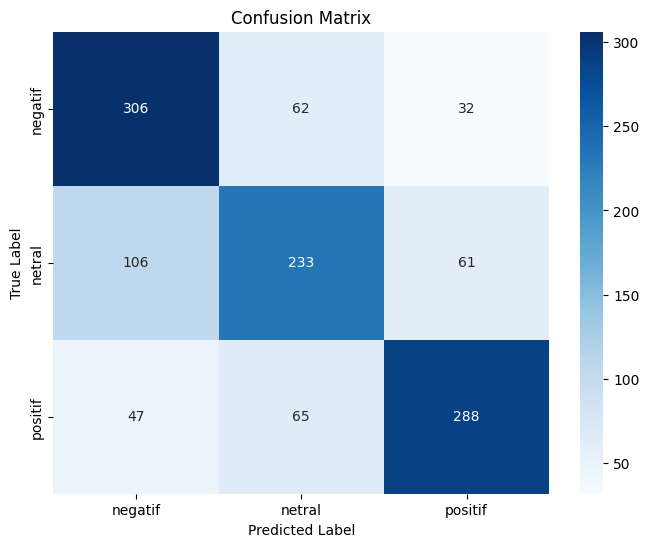

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Training
model = MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True)
model.fit(X_train_tfidf, y_train)

# Prediksi label
y_pred = model.predict(X_test_tfidf)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Hitung precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Hitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Hitung ROC AUC Score
# Dapatkan probabilitas dari model
y_score = model.predict_proba(X_test_tfidf)

# Binarisasi label y_test untuk multiclass AUC
classes = model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_binarized, y_score, multi_class='ovr', average='macro')
print(f"ROC AUC Score (multiclass - OvR): {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


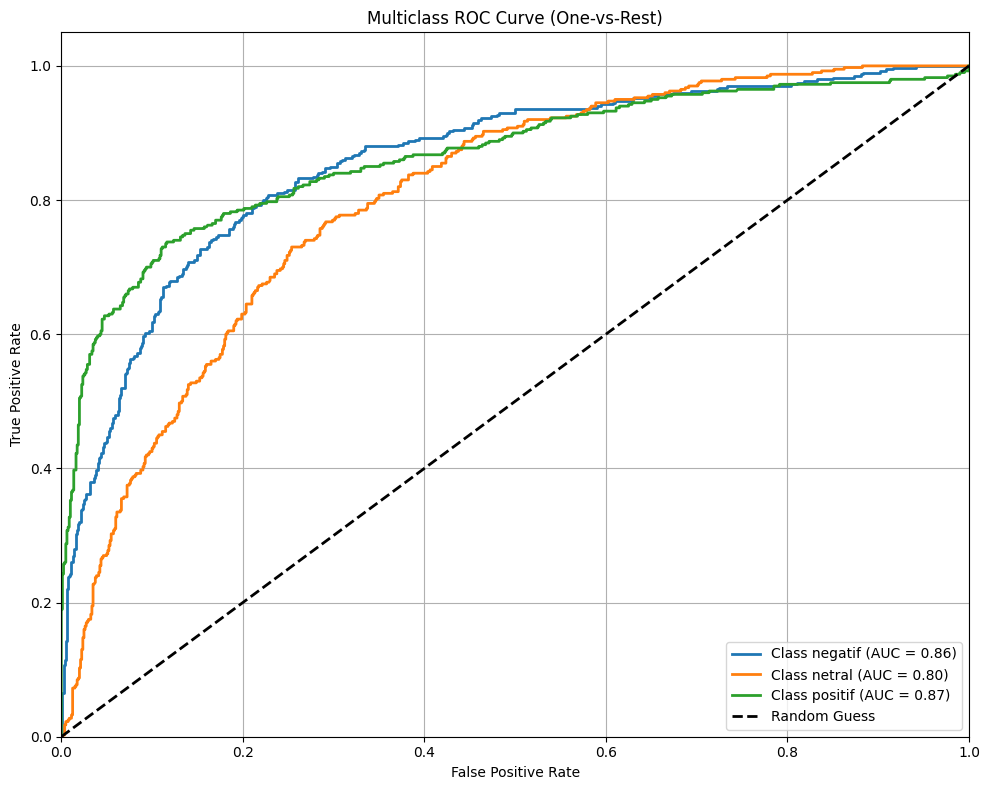

In [ ]:
# Probabilitas prediksi
y_prob = model.predict_proba(X_test_tfidf)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

classes = lb.classes_
n_classes = len(classes)

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import NotFittedError

# Siapkan DataFrame hasil evaluasi
results = []

# Daftar model yang ingin diuji
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "ComplementNB": ComplementNB()
}

# Loop semua model
for model_name, model in models.items():
    try:
        # GaussianNB butuh array, bukan sparse matrix
        if model_name == "GaussianNB":
            model.fit(X_train_tfidf.toarray(), y_train)
            y_pred = model.predict(X_test_tfidf.toarray())
            y_proba = model.predict_proba(X_test_tfidf.toarray())
        else:
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            y_proba = model.predict_proba(X_test_tfidf)

        model_filename = f'{model_name}_naive_bayes_model.job'
        jb.dump(model, model_filename)
        print(f"Model {model_name} disimpan sebagai '{model_filename}'")

        # Hitung metrik
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # ROC AUC multiclass (OvR)
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')

        # Simpan ke results
        results.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC AUC": roc_auc
        })

    except Exception as e:
        # Tangani error model (misalnya tidak support proba, dsb)
        print(f"Model {model_name} error: {e}")
        continue

# Buat dataframe hasil evaluasi dan sorting
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Tampilkan hasil akhir
print("Hasil Evaluasi Model Naive Bayes (sorted by F1-Score):")
results_df_sorted


Model MultinomialNB disimpan sebagai 'MultinomialNB_naive_bayes_model.job'
Model BernoulliNB disimpan sebagai 'BernoulliNB_naive_bayes_model.job'
Model GaussianNB disimpan sebagai 'GaussianNB_naive_bayes_model.job'
Model ComplementNB disimpan sebagai 'ComplementNB_naive_bayes_model.job'
Hasil Evaluasi Model Naive Bayes (sorted by F1-Score):


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,MultinomialNB,0.689167,0.689931,0.689167,0.687710,0.842248
1,ComplementNB,0.685833,0.684912,0.685833,0.683682,0.842660
2,BernoulliNB,0.674167,0.697595,0.674167,0.676578,0.832865
3,GaussianNB,0.588333,0.597370,0.588333,0.587489,0.698026


## Evaluasi - Hindia

In [ ]:
jb.dump()

## Referensi